In [1]:
from google.colab import files
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#After we cleaned(removed rows that have missing values) the orginal file from Zillow this is how it looks
zillow = files.upload()
zillow_df = pd.read_csv("filtered_and_cleaned_Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
zillow_df.head()

Saving filtered_and_cleaned_Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv to filtered_and_cleaned_Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv


,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,...,2022-12-31 00:00:00,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00
0,394913,1,"New York, NY",msa,NY,466176.900111,467719.878402,469506.430238,471376.946620,473947.024152,...,607957.914467,607138.375566,605781.039331,606096.535158,608105.120897,612136.785991,616308.017005,619911.494379,623211.984905,625939.720932
1,753899,2,"Los Angeles, CA",msa,CA,601730.974266,609723.299841,617314.049625,623093.887269,627727.748502,...,883096.482193,874754.169505,863791.280350,853971.725026,851581.705998,855385.245879,863224.274090,874493.271073,888127.785264,901894.488002
2,394463,3,"Chicago, IL",msa,IL,225562.670222,226910.082032,228466.578172,229683.092800,230635.115218,...,292513.670485,291906.868582,291753.784548,292397.065395,294085.140305,296271.600804,298827.032389,301362.893227,303811.358338,305636.274755
3,394514,4,"Dallas, TX",msa,TX,234334.264963,236142.779287,237969.039893,239597.357420,241127.809010,...,373653.261774,371121.004193,368863.612270,367332.301710,366782.695296,367067.613765,367882.973641,368856.669150,369775.450746,370189.087719
4,394692,5,"Houston, TX",msa,TX,204944.398419,205487.278675,206218.306013,207005.484201,207985.480700,...,305696.340485,303930.589405,302254.082042,301105.311602,300656.883192,300811.766923,301616.710392,302539.658318,303414.920970,303771.625932


In [3]:
#add a new column named 'StateAverage' that calculates the average price across
# each row

# Select only the date columns
date_columns = zillow_df.columns[5:]

# Calculate the average for each row (along the columns) representing the monthly records
zillow_df['StateAverage'] = zillow_df[date_columns].mean(axis=1)

# 'StateAverage' column now contains the average of the monthly records for each row

zillow_df.to_csv('StateAverage_included_Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv', index=False)

In [4]:
zillow_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,...,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,StateAverage
0,394913,1,"New York, NY",msa,NY,466176.900111,467719.878402,469506.430238,471376.946620,473947.024152,...,607138.375566,605781.039331,606096.535158,608105.120897,612136.785991,616308.017005,619911.494379,623211.984905,625939.720932,539480.597750
1,753899,2,"Los Angeles, CA",msa,CA,601730.974266,609723.299841,617314.049625,623093.887269,627727.748502,...,874754.169505,863791.280350,853971.725026,851581.705998,855385.245879,863224.274090,874493.271073,888127.785264,901894.488002,744956.445187
2,394463,3,"Chicago, IL",msa,IL,225562.670222,226910.082032,228466.578172,229683.092800,230635.115218,...,291906.868582,291753.784548,292397.065395,294085.140305,296271.600804,298827.032389,301362.893227,303811.358338,305636.274755,259102.101694
3,394514,4,"Dallas, TX",msa,TX,234334.264963,236142.779287,237969.039893,239597.357420,241127.809010,...,371121.004193,368863.612270,367332.301710,366782.695296,367067.613765,367882.973641,368856.669150,369775.450746,370189.087719,295475.523286
4,394692,5,"Houston, TX",msa,TX,204944.398419,205487.278675,206218.306013,207005.484201,207985.480700,...,303930.589405,302254.082042,301105.311602,300656.883192,300811.766923,301616.710392,302539.658318,303414.920970,303771.625932,249289.427818


In [5]:
# Cluster based housing price using all monthly enteries

zillow_df = pd.read_csv('StateAverage_included_Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
# Select the housing price columns for clustering
housing_price_data = zillow_df.loc[:, '2018-01-31 00:00:00':'2023-09-30 00:00:00']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(housing_price_data)

# Choose the number of clusters
n_clusters = 15
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original data
zillow_df['Cluster'] = clusters

# Print the count of RegionNames for each cluster
cluster_counts = zillow_df['Cluster'].value_counts()
print(cluster_counts)

# Save the data with added cluster information to a new CSV file
zillow_df.to_csv('original_data_with_clusters.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8     134
13    130
5     128
2      93
11     89
9      84
0      80
6      52
14     28
3      24
7      15
1      10
12      5
10      5
4       4
Name: Cluster, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

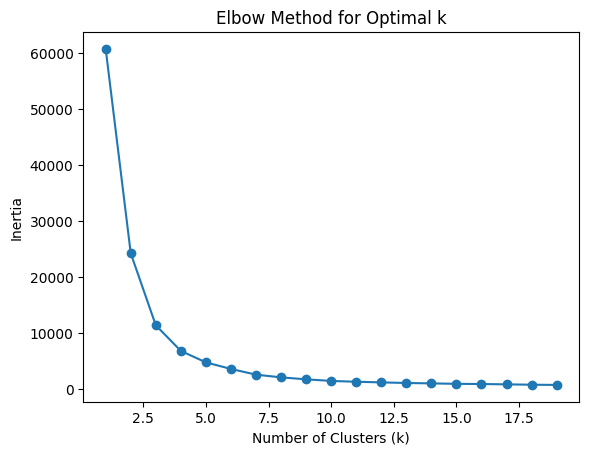

In [6]:
# use the elbow method to check approprite vale for k

# Select the housing price columns for clustering
housing_price_data = zillow_df.loc[:, '2018-01-31 00:00:00':'2023-09-30 00:00:00']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(housing_price_data)

# Try different values of k value and calculate the inertia for each k
inertia_values = []
possible_k_values = range(1, 20)
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(possible_k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

After looking at the graph above we chose our k to be 5
And we will have 5 clusters

In [7]:
# Another clustering with k=5

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(housing_price_data)

# Choose the number of clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original data
zillow_df['Cluster'] = clusters

# Print the count of RegionNames for each cluster
cluster_counts = zillow_df['Cluster'].value_counts()
print(cluster_counts)

# Save the data with added cluster information to a new CSV file
zillow_df.to_csv('original_data_with_clusters.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    342
3    307
1    161
4     49
2     22
Name: Cluster, dtype: int64


In [10]:
# Here is the file with StateAverage and Cluster columns added
zillow_df = pd.read_csv("original_data_with_clusters.csv")
zillow_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,...,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,StateAverage,Cluster
0,394913,1,"New York, NY",msa,NY,466176.900111,467719.878402,469506.430238,471376.946620,473947.024152,...,605781.039331,606096.535158,608105.120897,612136.785991,616308.017005,619911.494379,623211.984905,625939.720932,539480.597750,4
1,753899,2,"Los Angeles, CA",msa,CA,601730.974266,609723.299841,617314.049625,623093.887269,627727.748502,...,863791.280350,853971.725026,851581.705998,855385.245879,863224.274090,874493.271073,888127.785264,901894.488002,744956.445187,2
2,394463,3,"Chicago, IL",msa,IL,225562.670222,226910.082032,228466.578172,229683.092800,230635.115218,...,291753.784548,292397.065395,294085.140305,296271.600804,298827.032389,301362.893227,303811.358338,305636.274755,259102.101694,1
3,394514,4,"Dallas, TX",msa,TX,234334.264963,236142.779287,237969.039893,239597.357420,241127.809010,...,368863.612270,367332.301710,366782.695296,367067.613765,367882.973641,368856.669150,369775.450746,370189.087719,295475.523286,1
4,394692,5,"Houston, TX",msa,TX,204944.398419,205487.278675,206218.306013,207005.484201,207985.480700,...,302254.082042,301105.311602,300656.883192,300811.766923,301616.710392,302539.658318,303414.920970,303771.625932,249289.427818,3


We added median-household income information that we got from another dataset into this csv file we are currently working on


In [13]:
# Load your original data
original_data = pd.read_csv('original_data_with_clusters.csv')

# Load the median household income data
income_csv = files.upload()
income_data = pd.read_csv('median-household-income-by-state-2023.csv')

# Mapping of abbreviated state names to full state names
state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Apply the mapping to the 'StateName' column in the original data
original_data['StateName'] = original_data['StateName'].map(state_mapping)

# Merge the two DataFrames based on the 'StateName' column
merged_data = pd.merge(original_data, income_data[['state', 'MedianHouseholdIncome2021']], left_on='StateName', right_on='state', how='left')

# Drop the redundant 'state' column after merging
merged_data = merged_data.drop(columns=['state'])

# Save the merged DataFrame to a new CSV file
merged_data.to_csv('zillow_data_with_cluster&income.csv', index=False)

Saving median-household-income-by-state-2023.csv to median-household-income-by-state-2023.csv


In [14]:
# After adding the median income information and correct clustering info to our file it looks like

In [15]:
# Here is the file with StateAverage and Cluster columns added
zillow_df = pd.read_csv("zillow_data_with_cluster&income.csv")
zillow_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,...,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,StateAverage,Cluster,MedianHouseholdIncome2021
0,394913,1,"New York, NY",msa,New York,466176.900111,467719.878402,469506.430238,471376.946620,473947.024152,...,606096.535158,608105.120897,612136.785991,616308.017005,619911.494379,623211.984905,625939.720932,539480.597750,4,74314.0
1,753899,2,"Los Angeles, CA",msa,California,601730.974266,609723.299841,617314.049625,623093.887269,627727.748502,...,853971.725026,851581.705998,855385.245879,863224.274090,874493.271073,888127.785264,901894.488002,744956.445187,2,84907.0
2,394463,3,"Chicago, IL",msa,Illinois,225562.670222,226910.082032,228466.578172,229683.092800,230635.115218,...,292397.065395,294085.140305,296271.600804,298827.032389,301362.893227,303811.358338,305636.274755,259102.101694,1,72205.0
3,394514,4,"Dallas, TX",msa,Texas,234334.264963,236142.779287,237969.039893,239597.357420,241127.809010,...,367332.301710,366782.695296,367067.613765,367882.973641,368856.669150,369775.450746,370189.087719,295475.523286,1,66963.0
4,394692,5,"Houston, TX",msa,Texas,204944.398419,205487.278675,206218.306013,207005.484201,207985.480700,...,301105.311602,300656.883192,300811.766923,301616.710392,302539.658318,303414.920970,303771.625932,249289.427818,3,66963.0


Add a new column called'Affordability' by dividing StateAverage and MedianHouseholdIncome2021 column

In [16]:
# Add the 'Affordability' column
zillow_df['Affordability'] = zillow_df['StateAverage'] / zillow_df['MedianHouseholdIncome2021']

# Save to the DataFrame
zillow_df.to_csv('zillow_data_with_cluster&income.csv', index=False)

In [18]:
# Our dataset with all information
# StateAverage, Cluster, MedianHouseholdIncome2021, and Affordability
zillow_df = pd.read_csv('zillow_data_with_cluster&income.csv')
zillow_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,...,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,StateAverage,Cluster,MedianHouseholdIncome2021,Affordability
0,394913,1,"New York, NY",msa,New York,466176.900111,467719.878402,469506.430238,471376.946620,473947.024152,...,608105.120897,612136.785991,616308.017005,619911.494379,623211.984905,625939.720932,539480.597750,4,74314.0,7.259475
1,753899,2,"Los Angeles, CA",msa,California,601730.974266,609723.299841,617314.049625,623093.887269,627727.748502,...,851581.705998,855385.245879,863224.274090,874493.271073,888127.785264,901894.488002,744956.445187,2,84907.0,8.773793
2,394463,3,"Chicago, IL",msa,Illinois,225562.670222,226910.082032,228466.578172,229683.092800,230635.115218,...,294085.140305,296271.600804,298827.032389,301362.893227,303811.358338,305636.274755,259102.101694,1,72205.0,3.588423
3,394514,4,"Dallas, TX",msa,Texas,234334.264963,236142.779287,237969.039893,239597.357420,241127.809010,...,366782.695296,367067.613765,367882.973641,368856.669150,369775.450746,370189.087719,295475.523286,1,66963.0,4.412519
4,394692,5,"Houston, TX",msa,Texas,204944.398419,205487.278675,206218.306013,207005.484201,207985.480700,...,300656.883192,300811.766923,301616.710392,302539.658318,303414.920970,303771.625932,249289.427818,3,66963.0,3.722794


Print informations for top six regions with their StateAverage, MedianIncome and Affordability values in each clusters

In [19]:
# Print clustering information for each cluster with the top six regions
for cluster_id in zillow_df['Cluster'].unique():
    cluster_data = zillow_df[zillow_df['Cluster'] == cluster_id]

    top_regions = cluster_data.nlargest(6, 'StateAverage')

    print(f'Cluster {cluster_id}:')

    for index, row in top_regions.iterrows():
        print(f"RegionName: {row['RegionName']}, StateAverage: {row['StateAverage']}, MedianIncome: {row['MedianHouseholdIncome2021']}, Affordability: {row['Affordability']}")

    print('\n')

Cluster 4:
RegionName: Boulder, CO, StateAverage: 620789.6059029918, MedianIncome: 82254.0, Affordability: 7.547226954348625
RegionName: Seattle, WA, StateAverage: 590470.3703711907, MedianIncome: 84247.0, Affordability: 7.008799961674489
RegionName: Gardnerville Ranchos, NV, StateAverage: 556439.3392560552, MedianIncome: 66274.0, Affordability: 8.396042780819856
RegionName: Hood River, OR, StateAverage: 548397.5245757506, MedianIncome: 71562.0, Affordability: 7.66325039232764
RegionName: Truckee, CA, StateAverage: 546984.9658887038, MedianIncome: 84907.0, Affordability: 6.442165732963169
RegionName: Bozeman, MT, StateAverage: 543099.6916649338, MedianIncome: 63249.0, Affordability: 8.58669214793805


Cluster 2:
RegionName: Vineyard Haven, MA, StateAverage: 1088744.7897055943, MedianIncome: 89645.0, Affordability: 12.145069883491486
RegionName: Jackson, WY, StateAverage: 1033515.7577550624, MedianIncome: 65204.0, Affordability: 15.850496254141808
RegionName: San Francisco, CA, StateAve

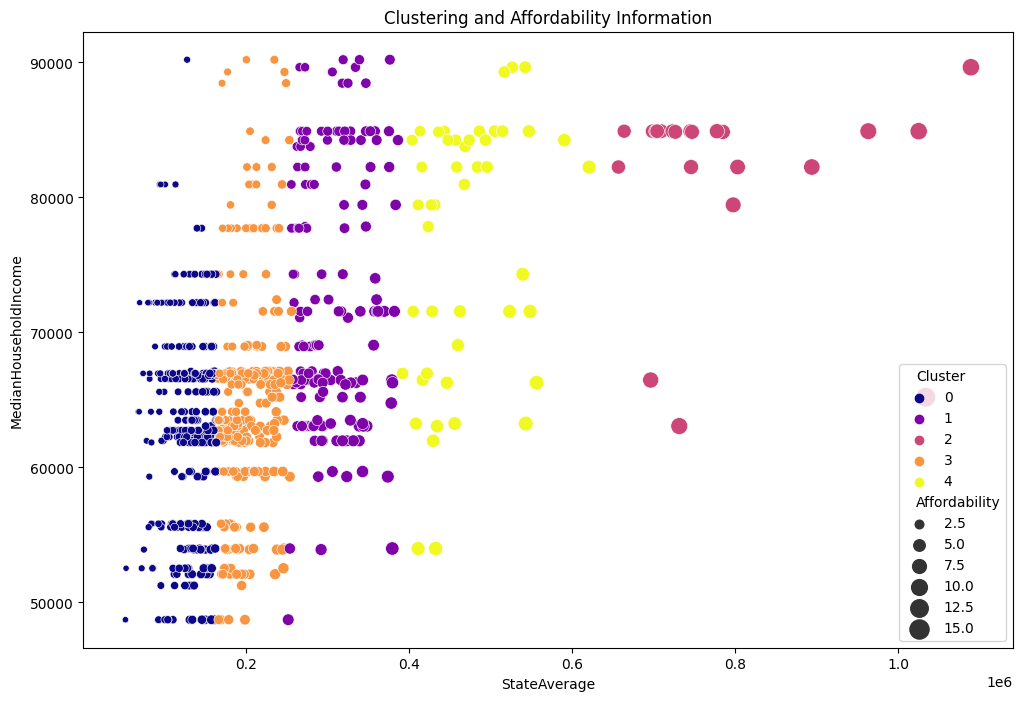

In [20]:
# Visualization to help us undestand affordable clusters


# Scatter plot with clusters and affordability information

plt.figure(figsize=(12, 8))

sns.scatterplot(x='StateAverage', y='MedianHouseholdIncome2021', hue='Cluster', size='Affordability', data=zillow_df, palette='plasma', sizes=(20, 200))

# Add labels and title
plt.xlabel('StateAverage')
plt.ylabel('MedianHouseholdIncome')
plt.title('Clustering and Affordability Information')

plt.show()



The above scatterplot show clusters and their affordability

Cluster 0: blue

> Affordability: High(lowest price)




---

Cluster 3:orange


> Affordability: Moderate to high(low to moderate housing prices)



---


Cluster 1: purple


> Affordability: Moderate



---

Cluster 4: yellow


> Affordability: Moderate to low(High housing prices)



---

Cluster 2: pink


> Affordability: Relatively low(expensive)




<ipython-input-21-c48e68f9170d>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RegionName', y='Affordability', data=top_regions, palette=[cluster_palette[cluster_num]], ci=None)
<ipython-input-21-c48e68f9170d>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RegionName', y='Affordability', data=top_regions, palette=[cluster_palette[cluster_num]], ci=None)
<ipython-input-21-c48e68f9170d>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RegionName', y='Affordability', data=top_regions, palette=[cluster_palette[cluster_num]], ci=None)
<ipython-input-21-c48e68f9170d>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RegionName', y='Affordability', data=top_regions, palette=[cluster_palette[cluster_num]], ci=None)
<ipython-input-21-c4

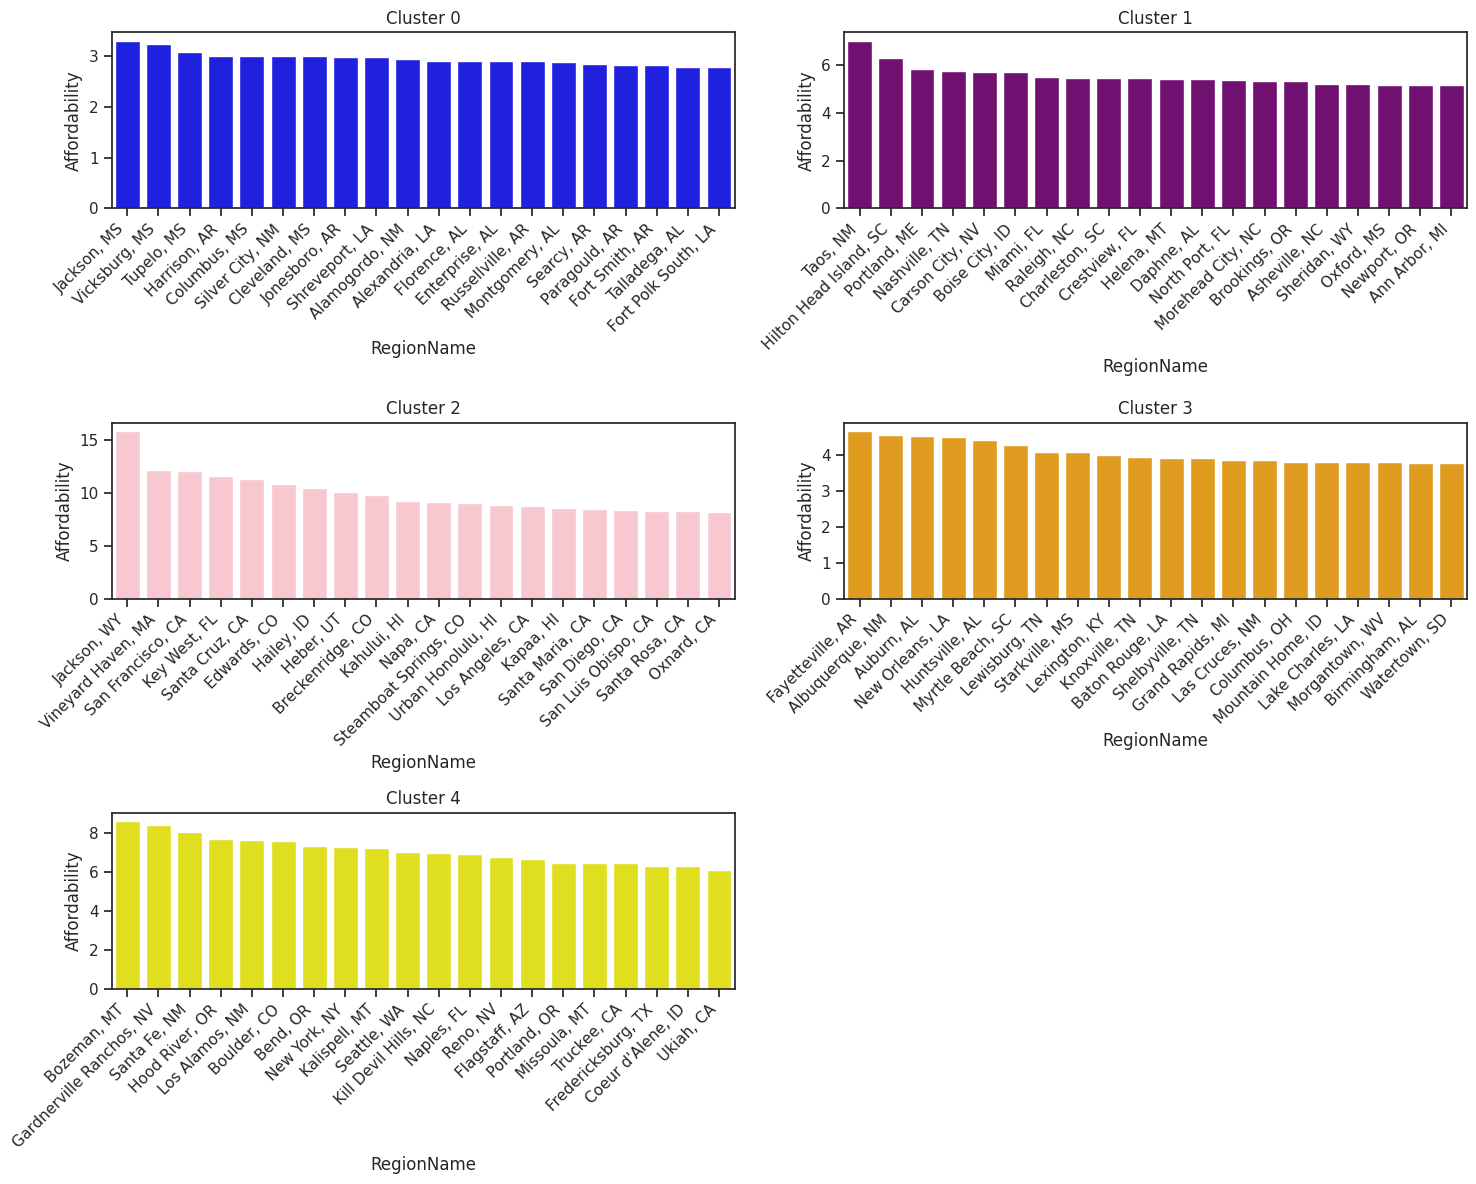

In [21]:
# Set the style for the plots
sns.set(style="ticks")

# Define color palette for each cluster
cluster_palette = {0: 'blue', 1: 'purple', 2: 'pink', 3: 'orange', 4: 'yellow'}

# Create subplots for each cluster
plt.figure(figsize=(15, 12))
for cluster_num in range(5):
    plt.subplot(3, 2, cluster_num+1)

    # Filter data for the current cluster
    cluster_data = zillow_df[zillow_df['Cluster'] == cluster_num]

    # Sort regions by affordability and select the top 20
    top_regions = cluster_data.sort_values(by='Affordability', ascending=False).head(20)

    # Create a bar chart for average housing prices
    sns.barplot(x='RegionName', y='Affordability', data=top_regions, palette=[cluster_palette[cluster_num]], ci=None)

    # Set plot labels and title
    plt.xlabel('RegionName')
    plt.ylabel('Affordability')
    plt.title(f'Cluster {cluster_num}')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()


plt.show()
